In [107]:
# Importing libraries
import os
import pandas as pd
import numpy as np
# ploting 2D data
from matplotlib import pyplot
# ploting 3D data
from mpl_toolkits.mplot3d import Axes3D

In [108]:
# Loading data set with pandas and cleaning some data

df = pd.read_csv('nyc-east-river-bicycle-counts.csv')
df.drop('Unnamed: 0', inplace=True, axis = 1)

In [109]:
# Extracting our x and y from data set as series and converting them to numpy array 

x_all = df[['High Temp (°F)', 'Low Temp (°F)', 'Precipitation']].to_numpy()
x = df['Precipitation'].to_numpy()
y_all = df[['Brooklyn Bridge', 'Manhattan Bridge','Williamsburg Bridge', 'Queensboro Bridge']].to_numpy()
y = df['Brooklyn Bridge']
m = y.size

In [110]:
x = np.append(x.reshape(m,1), (x**2).reshape(m,1), axis=1)

In [111]:
x = np.insert(x, 2, (x[:,0])**3, axis=1)
x = np.insert(x, 3, (x[:,0])**4, axis=1)
x = np.insert(x, 4, (x[:,0])**5, axis=1)
x = np.insert(x, 5, (x[:,0])**6, axis=1)

In [113]:
# before we start writing cost function we have to insert one column to X matrix, be cause we are gonna use
# vectorized version of computation
#Do not run this column more than ones
x = np.append(np.ones(m).reshape(m,1), x.reshape(m,6), axis=1)

In [114]:
def compute_cost_function_of_degree_2(x, y, theta):
    m = y.size
    j = 0
    h = x @ theta
    difference = (h - y) ** 2
    j = np.sum(difference) / (2 * m)
    return j

In [116]:
# Testing cost function if it works
compute_cost_function_of_degree_2(x, y, np.array([0,0,0,0,0,0,0]))

3054739.0833333335

In [117]:
def gradient_decent(x,y,theta,alpha,num_iters):
    m = y.shape[0]
    tetha = theta.copy()
    info = []
    for i in range(num_iters):
        h = x @ theta
        difference = (h - y)
        theta = theta - (alpha / m) * (x.T @ difference)
        
        #then we compute cost function for each itteration to see the changes
        j = compute_cost_function_of_degree_2(x,y, theta)
        info.append([i, j])
        
    return theta, info

In [118]:
def visualise_cost_function(x,y):
    pyplot.plot(x, y, c='red')
    pyplot.xlabel('Number Of Itteration')
    pyplot.ylabel('Cost Function')
    pyplot.show()

In [119]:
def scatter(x,y):
    pyplot.scatter(x, y)
    pyplot.show()

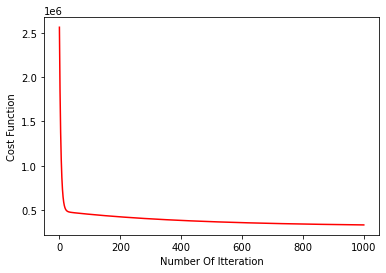

[ 2464.49901284 -3503.3810302   -835.57200327  -296.58803335
  -126.59948504   -57.64724867   -26.80960792]


In [128]:
# finding first y's thetas
theta_test_0, info = gradient_decent(x, y, np.array([0,0,0,0,0,0,0]) ,0.1, 1000)
info = np.array([info])
info = info.T
visualise_cost_function(info[0], info[1])
print(theta_test_0)

In [129]:
def polonomyal_x(x_input, degree):
    size = x_input.size
    arr = np.zeros((size, degree))
    for i in range(degree):
        arr[:, i] = x_input ** (i + 1)
    
    return arr

In [130]:
x_pred = np.linspace(0, 0.9 , pred.size)
result = polonomyal_x(x_pred, 6)
result = np.insert(result, 0,  np.ones(m), axis=1)

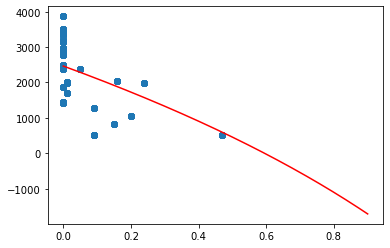

In [131]:
pyplot.scatter(x[:, 1],y)
pred = result @ theta_test_0
pyplot.plot(x_pred, pred, c='red', ms=2, mec='k', mew=1.5)
pass